In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
drug_df = pd.read_csv('../data/Screened_Compounds.csv', index_col='DRUG_ID')

In [3]:
drug_df.describe()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
count,267,220,267,267
unique,257,206,202,24
top,Afatinib,"GDC-0941, GDC0941, RG-7621","MEK1, MEK2",Other
freq,2,2,7,47


In [3]:
drug_df.head(200)

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
DRUG_ID,,,,
1,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
3,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
5,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
6,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
9,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation
...,...,...,...,...
1031,Elesclomol,STA-4783,HSP90,Protein stability and degradation
1032,Afatinib,"BIBW2992, Tovok, Gilotrif","ERBB2, EGFR",EGFR signaling
1033,Vismodegib,"GDC0449, Erivedge",SMO,Other


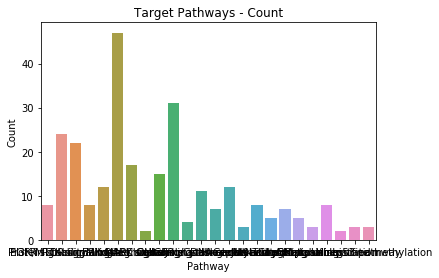

In [5]:
# plot counts of soil types
ax = sns.countplot(drug_df['TARGET_PATHWAY'])
ax.set(xlabel='Pathway', ylabel='Count', title='Target Pathways - Count')
plt.show()

In [6]:
drug_df['TARGET_COUNT'] = drug_df['TARGET'].str.split(",").str.len()

In [4]:
drug_df.TARGET_PATHWAY.unique()

array(['EGFR signaling', 'PI3K/MTOR signaling', 'RTK signaling',
       'Protein stability and degradation', 'Mitosis', 'Other',
       'ERK MAPK signaling', 'ABL signaling', 'Cell cycle',
       'Other, kinases', 'IGFR signaling',
       'Chromatin histone acetylation', 'Cytoskeleton', 'DNA replication',
       'Hormone-related', 'Genome integrity', 'WNT signaling',
       'JNK and p38 signaling', 'Chromatin other', 'Metabolism',
       'Apoptosis regulation', 'Unclassified',
       'Chromatin histone methylation', 'p53 pathway'], dtype=object)

In [7]:
drug_df.head()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,TARGET_COUNT
DRUG_ID,,,,,
1,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling,1
3,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling,1
5,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling,6
6,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling,1
9,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation,2


In [8]:
pathway_df = drug_df.groupby(['TARGET_PATHWAY'])

In [9]:
pathway_df.count()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_COUNT
TARGET_PATHWAY,,,,
ABL signaling,2,2,2,2
Apoptosis regulation,8,6,8,8
Cell cycle,15,10,15,15
Chromatin histone acetylation,11,7,11,11
Chromatin histone methylation,3,2,3,3
Chromatin other,5,4,5,5
Cytoskeleton,7,5,7,7
DNA replication,12,10,12,12
EGFR signaling,8,8,8,8


In [10]:
pathway_df['TARGET_COUNT'].sum()

TARGET_PATHWAY
ABL signaling                         2
Apoptosis regulation                 16
Cell cycle                           33
Chromatin histone acetylation        20
Chromatin histone methylation         3
Chromatin other                      13
Cytoskeleton                         13
DNA replication                      12
EGFR signaling                       11
ERK MAPK signaling                   26
Genome integrity                     13
Hormone-related                       3
IGFR signaling                        7
JNK and p38 signaling                12
Metabolism                            3
Mitosis                              18
Other                                89
Other, kinases                       57
PI3K/MTOR signaling                  43
Protein stability and degradation     9
RTK signaling                        65
Unclassified                          3
WNT signaling                        10
p53 pathway                           3
Name: TARGET_COUNT, dtype

In [21]:

target_drug_list = []


for index, row in drug_df.iterrows():
    for target in row['TARGET'].split(","):
        
        target_drug_list.append([target.strip(), row['DRUG_ID'], index, row['TARGET_PATHWAY']])








KeyError: 'DRUG_ID'

In [13]:
target_drug_df = pd.DataFrame(target_drug_list)

In [14]:
target_drug_df.head()

,0,1,2,3
0,EGFR,Erlotinib,1,EGFR signaling
1,MTORC1,Rapamycin,3,PI3K/MTOR signaling
2,PDGFR,Sunitinib,5,RTK signaling
3,KIT,Sunitinib,5,RTK signaling
4,VEGFR,Sunitinib,5,RTK signaling


In [15]:
target_drug_columns = ["TARGET", "DRUG_NAME", "DRUG_ID", "TARGET_PATHWAY"]
target_drug_df.columns = target_drug_columns

In [16]:
target_drug_df.head()

,TARGET,DRUG_NAME,DRUG_ID,TARGET_PATHWAY
0,EGFR,Erlotinib,1,EGFR signaling
1,MTORC1,Rapamycin,3,PI3K/MTOR signaling
2,PDGFR,Sunitinib,5,RTK signaling
3,KIT,Sunitinib,5,RTK signaling
4,VEGFR,Sunitinib,5,RTK signaling


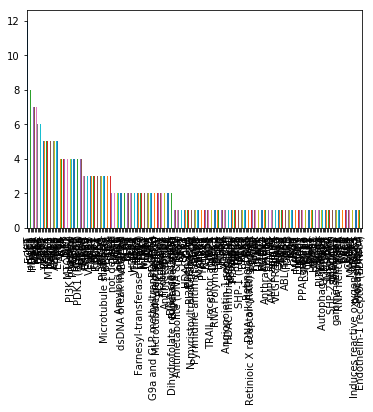

In [17]:
target_drug_df.TARGET.value_counts().plot(kind='bar')

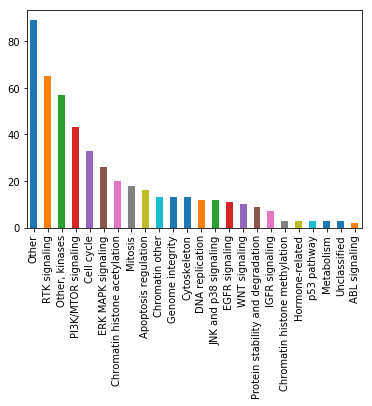

In [18]:
target_drug_df.TARGET_PATHWAY.value_counts().plot(kind='bar')

In [105]:
response_threshold_df = pd.read_csv('../data/rt_trans.csv')
response_threshold_df.head()

,Screened Compounds:,Discretisation Threshold (log IC50)/ Cell-Lines
0,Wee1 Inhibitor,0.63688
1,(5Z)-7-Oxozeaenol,-0.60596
2,Tanespimycin,-3.26790
3,5-Fluorouracil,1.12360
4,A-443654,-2.33850


In [51]:
#response_threshold_df.to_csv('../data/rt_trans.csv')

In [106]:
for index, row in response_threshold_df.iterrows():
    drug_name = row[0]
    threshold_value = row[1]
    
    drug_df.loc[drug_df['DRUG_NAME'].str.upper() == drug_name.upper(), "THRESHOLD"] = threshold_value
        
    
    
    

In [81]:
drug_df.loc[1072].DRUG_NAME = 'BMS-708163.1'

In [107]:
drug_df[drug_df.THRESHOLD.isna()].sort_values('DRUG_NAME')

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,THRESHOLD
DRUG_ID,,,,,
275,I-BET-762,GSK525762A,"BRD2, BRD3, BRD4",Chromatin other,NaN
1266,ICL1100013,NaN,N-myristoyltransferase 1/2,Other,NaN
1219,PFI-1,NaN,BRD4,Chromatin other,NaN


In [108]:
drug_df.to_csv('../data/Screened_Compounds_WT.csv')

In [11]:
drug_df.describe()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,THRESHOLD
count,267,220,267,267,191.000
unique,252,206,202,24,181.000
top,Pictilisib,"BMS-708163, BMS 708163","MEK1, MEK2",Other,-1.898
freq,2,2,7,47,2.000


In [ ]:
print(drug_df.to_json(orient='records'))

In [8]:
drug_df[drug_df.DRUG_NAME == 'Daporinad']

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
DRUG_ID,,,,
1248,Daporinad,"APO866, FK866, FK866",NAMPT,Metabolism


In [ ]:
drug_df['D_ID'] = drug_df['DRUG_ID']

In [16]:
drug_df_2 = pd.read_csv('../data/Screened_Compounds.csv')

In [ ]:
print(drug_df_2.to_json(orient='records'))

In [17]:
drug_df_2

,DRUG_ID,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
0,1,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation
...,...,...,...,...,...
262,1502,Bicalutamide,"ICI-176334, Casodex, Cosudex, ICI 176334",AR,Hormone-related
263,1526,Refametinib (rescreen),"RDEA119, BAY-86-9766, BAY 869766","MEK1, MEK2",ERK MAPK signaling
264,1527,Pictilisib (rescreen),"GDC-0941, GDC0941, RG-7621",PI3K (class 1),PI3K/MTOR signaling
265,1529,Pevonedistat,"MLN4924, MLN 4924, MLN-4924",NAE,Other


In [20]:
len(drug_df_2.TARGET_PATHWAY.unique())

24

In [33]:

targret_drug_matrix = []

td_id = 0

for index, row in drug_df_2.iterrows():
    for target in row['TARGET'].split(","):
        
        targret_drug_matrix.append([td_id, row['DRUG_ID'], target.strip(), row['TARGET_PATHWAY']])
        td_id += 1






In [34]:
target_drug_matrix_df = pd.DataFrame(targret_drug_matrix)

In [35]:
target_drug_columns = ["TD_MATRIX_ID","DRUG_ID", "TARGET", "TARGET_PATHWAY"]
target_drug_matrix_df.columns = target_drug_columns

In [36]:
target_drug_matrix_df

,TD_MATRIX_ID,DRUG_ID,TARGET,TARGET_PATHWAY
0,0,1,EGFR,EGFR signaling
1,1,3,MTORC1,PI3K/MTOR signaling
2,2,5,PDGFR,RTK signaling
3,3,5,KIT,RTK signaling
4,4,5,VEGFR,RTK signaling
...,...,...,...,...
479,479,1527,PI3K (class 1),PI3K/MTOR signaling
480,480,1529,NAE,Other
481,481,1530,SMARCA2,Other
482,482,1530,SMARCA4,Other


In [41]:
target_drug_matrix_df.TARGET.unique()

array(['EGFR', 'MTORC1', 'PDGFR', 'KIT', 'VEGFR', 'FLT3', 'RET', 'CSF1R',
       'MET', 'Proteasome', 'CAPN1', 'Microtubule stabiliser', 'SMO',
       'BRAF', 'RAF', 'AURKA', 'AURKB', 'AURKC', 'others', 'ABL', 'ALK',
       'ROS1', 'SRC', 'KIF11', 'gamma-secretase', 'Ephrins', 'BCR-ABL',
       'CDK1', 'CDK2', 'CDK5', 'CDK7', 'CDK9', 'PKC', 'CDK4', 'LCK',
       'FYN', 'BMX', 'PLK1', 'PLK2', 'PLK3', 'IGF1R', 'IR', 'ITK', 'RSK2',
       'Dihydrofolate reductase (DHFR)', 'MTOR', 'AKT1', 'AKT2', 'AKT3',
       'HDAC1', 'HDAC3', 'IKK', 'PI3Kbeta', 'ERK5', 'BET', 'EIF2A',
       'ERBB2', 'ROCK1', 'ROCK2', 'Anthracycline', 'TOP2',
       'Pyrimidine antimetabolite', 'DNA crosslinker',
       'Microtubule destabiliser', 'SHP-1 (PTPN6)', 'SHP-2 (PTPN11)',
       'AR', 'ARFGAP1', 'ATM', 'PPK', 'FLT1', 'c-FGR', 'GSK3A', 'GSK3B',
       'PDGFRA', 'VEGFR2', 'FGFR1', 'TIE2', 'JNK2', 'JNK3', 'FAK', 'FAK2',
       'BRD2', 'BRD3', 'BRD4', 'BRDT', 'HDAC2', 'HIF-PH',
       'Farnesyl-transferase (FNTA)'

In [ ]:
print(target_drug_matrix_df.to_json(orient='records'))